Дисциплина «Машинное обучение 
в прикладных задачах анализа данных»
Рабочая тетрадь № 4
Регрессия – это зависимость среднего значения какой-либо величины 
от некоторой другой величины или от нескольких других величин. В 
отличие от чисто функциональной зависимости 𝑦 = 𝑓(𝑥), когда каждому 
значению независимой переменной 𝑥𝑥 соответствует одно определённое 
значение зависимой переменной у, при регрессионной связи одному и тому 
же значению независимой переменной (фактору) 𝑥𝑥 могут соответствовать в 
зависимости от конкретного случая различные значения зависимой 
переменной (отклика) у.
Изучение регрессии основано на том, что случайные величины Х и 𝑌
связаны между собой вероятностной зависимостью: при каждом 
конкретном значении 𝑋𝑋 = 𝑥𝑥 величина 𝑌𝑌 является случайной величиной с 
вполне определённым распределением вероятностей. Зависимость 
зависимой переменной – отклика от одной независимой переменной –
фактора или нескольких факторов называется уравнением регрессии. По 
количеству факторов выделяют парную (однофакторную) и 
множественную (многофакторную) регрессию. Для парной будем 
рассматривать следующие методы регрессии: линейную, показательную, 
экспоненциальную, гиперболическую и параболическую.
Регрессионный анализ – это раздел математической статистики, 
изучающий регрессионную зависимость между случайными величинами по 
статистическим данным. Цель регрессионного анализа состоит в 
определении общего вида уравнения регрессии, вычислении оценок 
неизвестных параметров, входящих в уравнение регрессии проверке 
статистических гипотез о регрессионной связи.
Таким образом, регрессионный анализ – набор статистических 
методов исследования влияния одной или нескольких независимых 
переменных 𝑋𝑋1, … , 𝑋𝑋𝑛𝑛 на зависимую переменную 𝑌𝑌. Независимые 
переменные иначе называют регрессорами или предикторами, а зависимые 
переменные – критериальными переменными.
1.1. Теоретический материал – Линейные регрессионные модели
Линейная регрессия
Линейная регрессия (Linear regression) – модель зависимости переменной 
x от одной или нескольких других переменных (факторов, регрессоров, 
независимых переменных) с линейной функцией зависимости. Линейная 
регрессия относится к задаче определения «линии наилучшего соответствия» 
через набор точек данных и стала простым предшественником нелинейных 
методов, которые используют для обучения нейронных сетей.
Цель линейной регрессии — поиск линии, которая наилучшим образом 
соответствует этим точкам. Напомним, что общее уравнение для прямой есть 
𝑓𝑓 (𝑥𝑥) = 𝑏𝑏 + 𝑚𝑚 ⋅ 𝑥𝑥 +, где 𝑚𝑚 – наклон линии, а 𝑏𝑏 – его сдвиг.
Функция потерь — метод наименьших квадратов
Функция потерь – это мера количества ошибок, которые наша линейная 
регрессия делает на наборе данных. Хотя есть разные функции потерь, все они 
вычисляют расстояние между предсказанным значением 𝑦𝑦(х) и его 
фактическим значением.
Одна очень распространенная функция потерь называется средней 
квадратичной ошибкой MSE. Чтобы вычислить MSE, мы просто берем все 
значения ошибок, считаем их квадраты длин и усредняем.
Задача экраполяции
Допустим у нас есть много экспериментальных точек. Необходимо через 
них провести кривую, которая как можно ближе проходила к этим точкам. При 
этом необходимо минимизировать среднюю квадратичную ошибку (MSE).
Для решения данной задачи в Python есть множество библиотек. Самыми 
распостраненными выступают:
numpy - numpy.linalg.lstsq
scipy - scipy.linalg (содержит все функции из numpy.linalg плюс часть 
новых функций, которых нет в numpy.linalg).




1.1.1 Пример
Задача:
Проведем прямую 𝑦𝑦 = 𝑚𝑚𝑚𝑚 + 𝑏𝑏 через экспериментальные точки.

Решение


In [ ]:
import numpy as np
x=np.array([0,1,2,3])
y=np.array([-1,0.2,0.9,2.1])
A=np.vstack([x,np.ones(len(x))]).T
print(A)
#Используем метод lstsq для решения уравнения относительно вектора p
m,c=np.linalg.lstsq(A,y,rcond=None)[0]
print(m,c)


[[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]]
0.9999999999999999 -0.9499999999999997


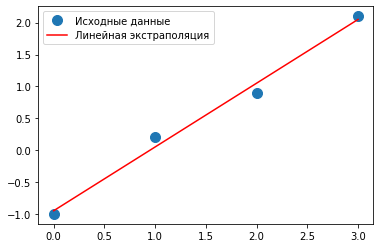

In [ ]:
#Далее строим график прямой и укажем точки на нем
import matplotlib.pyplot as plt
plt.plot(x,y,'o',label='Исходные данные',markersize=10)
plt.plot(x,m*x+c,'r',label='Линейная экстраполяция')
plt.legend()
plt.show()

1.1.2 Пример
Задача:
Пусть 𝑥, 𝑦 – вектора длиной 𝑛 > 3 (точек > 3). Задача заключается в 
построении эстраполяционного полинома второго порядка (параболы). Таким 
образом, необходимо найти такие коэффициенты полинома 𝑎, 𝑏, 𝑐 по методу 
наименьших квадратов. Данные мтогут быть получены в результате 
измерений. Покажем пример генерации данных случайным образом и 
загрузки их из файла.

Решение

[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
[24.68593152 15.61393834  9.37507332  3.63832724  1.45229347  0.34408812
  1.33323326  3.80916707  9.09828024 15.86132667 24.66548001]
[-5.3287462  -4.1088675  -2.68830668 -1.6099783  -1.23406599 -0.43184355
  1.45580327  2.15430055  2.65869071  3.835941    4.59313472]
-----------------------------------------------------------------------------------
[-5.3287462  -4.1088675  -2.68830668 -1.6099783  -1.23406599 -0.43184355
  1.45580327  2.15430055  2.65869071  3.835941    4.59313472]
[24.68593152 15.61393834  9.37507332  3.63832724  1.45229347  0.34408812
  1.33323326  3.80916707  9.09828024 15.86132667 24.66548001]
-----------------------------------------------------------------------------------
Vector m = [[28.39553612 -5.3287462   1.        ]
 [16.8827921  -4.1088675   1.        ]
 [ 7.22699278 -2.68830668  1.        ]
 [ 2.59203013 -1.6099783   1.        ]
 [ 1.52291886 -1.23406599  1.        ]
 [ 0.18648885 -0.43184355  1.        ]
 

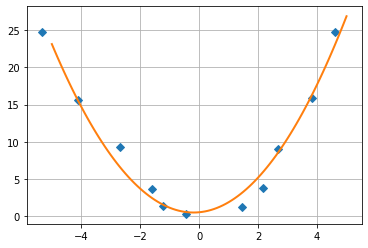

In [ ]:
from numpy import * 
from numpy.random import *
#Генерируем случайные X и Y
delta=1.0
x=linspace(-5,5,11)
y=x**2+delta*(rand(11)-0.5)
print(x)
print(y)
x=x+delta*(rand(11)-0.5)
print(x)
#Записывам данные в файл 
x.tofile('x_data.txt','\n')
y.tofile('y_data.txt','\n')
#Читаем данные из файла
print('-----------------------------------------------------------------------------------')
x=fromfile('x_data.txt',float,sep='\n')
y=fromfile('y_data.txt',float,sep='\n')
print(x)
print(y)
#Нахождение коэффициентов функции вида y = ax^2+bx+c методом наименьших квадратов 
#Задаем вектор m=[x**2,x,E]
print('-----------------------------------------------------------------------------------')
m=vstack((x**2,x,ones(11))).T
print('Vector m =',m)
#Находим коэффициенты при составляющих вектора m
s=np.linalg.lstsq(m,y,rcond=None)[0]
print('Vector s =',s)

#На отрезке [-5,5]
x_prec=linspace(-5,5,101)
#Рисуем точки 
plt.plot(x,y,'D')
#Рисуем кривую вида y = ax^2+bx+c подставляя из решения коэффициента  s[0],s[1].s[2]
plt.plot(x_prec,s[0]*x_prec**2+s[1]*x_prec+s[2],'-',lw=2)
plt.grid()
plt.savefig('парабола.png')

1.1.3 Пример
Задача:
По данным предыдущего примера постройте эстраполяционного полинома 
третьего порядка


Решение:



-----------------------------------------------------------------------------------
Vector m = [[-1.51312605e+02  2.83955361e+01 -5.32874620e+00  1.00000000e+00]
 [-6.93691557e+01  1.68827921e+01 -4.10886750e+00  1.00000000e+00]
 [-1.94283729e+01  7.22699278e+00 -2.68830668e+00  1.00000000e+00]
 [-4.17311227e+00  2.59203013e+00 -1.60997830e+00  1.00000000e+00]
 [-1.87938236e+00  1.52291886e+00 -1.23406599e+00  1.00000000e+00]
 [-8.05340069e-02  1.86488850e-01 -4.31843549e-01  1.00000000e+00]
 [ 3.08537584e+00  2.11936317e+00  1.45580327e+00  1.00000000e+00]
 [ 9.99813223e+00  4.64101085e+00  2.15430055e+00  1.00000000e+00]
 [ 1.87933176e+01  7.06863629e+00  2.65869071e+00  1.00000000e+00]
 [ 5.64437366e+01  1.47144434e+01  3.83594100e+00  1.00000000e+00]
 [ 9.69008423e+01  2.10968866e+01  4.59313472e+00  1.00000000e+00]]
Vector s = [ 0.05034303  1.03713255 -0.48814496  0.20052587]


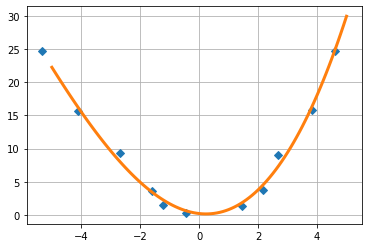

In [ ]:
#Нахождение коэффициентов функции вида y = ax^3+bx^2+cx+d методом наименьших квадратов 
#Задаем вектор m=[x**3,x,E]
print('-----------------------------------------------------------------------------------')
m=vstack((x**3,x**2,x,ones(11))).T
print('Vector m =',m)
#Находим коэффициенты при составляющих вектора m
s=np.linalg.lstsq(m,y,rcond=None)[0]
print('Vector s =',s)

#На отрезке [-5,5]
x_prec=linspace(-5,5,101)
#Рисуем точки 
plt.plot(x,y,'D')
#Рисуем кривую вида y = ax^3+bx^2+cx+d подставляя из решения коэффициента  s[0],s[1].s[2]
plt.plot(x_prec,s[0]*x_prec**3+s[1]*x_prec**2+s[2]*x_prec+s[3],'-',lw=3)
plt.grid()
plt.savefig('полином-3й_степени.png')

1.1.4 Пример
Задача:
Необходимо проверить гипотезу, что наши точечно заданная функция ложится 
на кривую вида 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑒xp(−𝑏2𝑥2)

Решение:

In [ ]:
#Добавим шума в данные, сделанные по функции f(x,b) c коэффициентами b = (0.25,0.75,0.5)
beta = (0.25,0.75,0.5)
def f(x,b0,b1,b2):
  return b0+b1*np.exp(-b2*x**2)
#Заданим массив точек xi 
xdata=linspace(0,5,50)
print('xdata =',xdata)
print('----------------------------------------')
y=f(xdata,*beta)
print('y=',y)
#Зашумляем данные
ydata=y+0.05*np.random.randn(len(xdata))
#Используем функцию для получения решения в виде коэффициентов функции f(x) для указанных xdata ydata 


xdata = [0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
----------------------------------------
y= [1.         0.99610552 0.98454301 0.96566897 0.94005726 0.90847009
 0.8718204  0.83112807 0.7874731  0.74194844 0.69561564 0.64946548
 0.6043856  0.56113642 0.52033584 0.48245259 0.44780767 0.41658268
 0.38883359 0.36450838 0.34346692 0.32550167 0.31035778 0.29775159
 0.28738699 0.27896884 0.27221363 0.26685723 0.26265991 0.25940921
 0.25692076 0.2550377  0.25362901 0.25258716 0.251825

0.00021531224854767542
0.10864060401519147


Text(0, 0.5, '$f(x,\\beta)$')

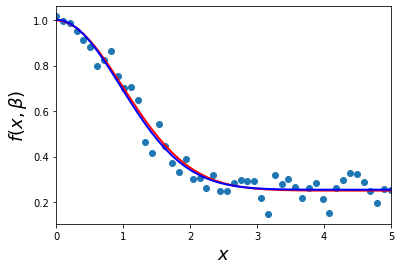

In [ ]:
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
beta_opt,beta_cov=scipy.optimize.curve_fit(f,xdata,ydata)
beta_opt
#Вычислим линейное отклонение 
lin_dev=sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение 
residuals = ydata-f(xdata,*beta_opt)
fres=sum(residuals**2)
print(fres)

fig,ax=plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$",fontsize=18)
ax.set_ylabel(r"$f(x,\beta)$",fontsize=18)

1.1.5 Пример
Задача:
Необходимо проверить гипотезу, что наши точечно заданная функция ложится 
на кривые вида: 
1) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥
2) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥 + 𝑏2𝑥2
3) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑙(𝑥)
4) 𝑓(𝑥, 𝑏) = 𝑏0 𝑥𝑏1

[0.28255616 0.74029825]
0.00011667929319807605
0.10259731042177833


Text(0, 0.5, '$f(x,\\beta)$')

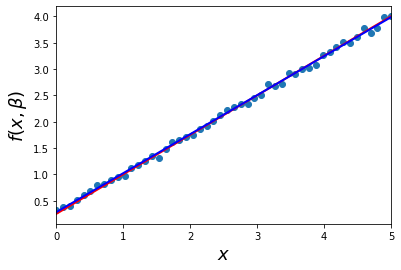

In [ ]:
#Решение 
#1
#Добавим шума в данные сделаннаые по ункции f(x,b)  с коэффициентами b=(0.25,0.75)
beta =(0.25,0.75)
def f(x,b0,b1):
  return b0+b1*x
#Зададим массив точек xi 
xdata=np.linspace(0,5,50)
#Создаем теоретически правильные значения точек yi без шума 
y=f(xdata,*beta)
# Зашумляем эти данные 
ydata=y+0.05 * np.random.randn(len(xdata))
beta_opt,beta_cov=scipy.optimize.curve_fit(f,xdata,ydata)
print(beta_opt)
#Вычислим линейное отклонение 
lin_dev=sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение 
residuals = ydata-f(xdata,*beta_opt)
fres=sum(residuals**2)
print(fres)

fig,ax=plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$",fontsize=18)
ax.set_ylabel(r"$f(x,\beta)$",fontsize=18)

[0.24017398 0.74591424 0.50120275]
0.0001293666957370847
0.10787828195370894


Text(0, 0.5, '$f(x,\\beta)$')

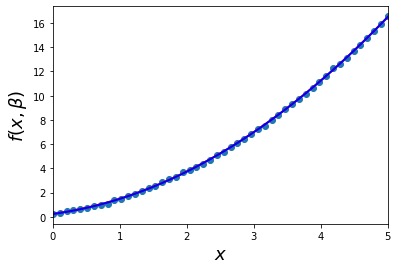

In [ ]:
#Решение номер 2 
#Добавим шума в данные сделаннаые по ункции f(x,b)  с коэффициентами b=(0.25,0.75,0.5)
beta =(0.25,0.75,0.5)
def f(x,b0,b1,b2):
  return b0+b1*x+b2*x**2
#Зададим массив точек xi 
xdata=np.linspace(0,5,50)
#Создаем теоретически правильные значения точек yi без шума 
y=f(xdata,*beta)
# Зашумляем эти данные 
ydata=y+0.05 * np.random.randn(len(xdata))
beta_opt,beta_cov=scipy.optimize.curve_fit(f,xdata,ydata)
print(beta_opt)
#Вычислим линейное отклонение 
lin_dev=sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение 
residuals = ydata-f(xdata,*beta_opt)
fres=sum(residuals**2)
print(fres)

fig,ax=plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$",fontsize=18)
ax.set_ylabel(r"$f(x,\beta)$",fontsize=18)

[0.99675713 1.9975914 ]
4.5109730787854836e-05
0.10431360684942015


Text(0, 0.5, '$f(x,\\beta)$')

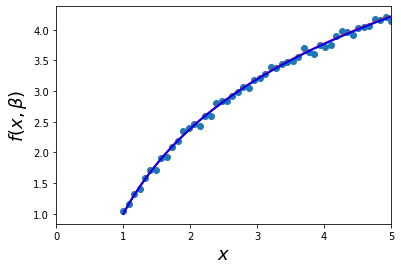

In [ ]:
#Добавим шума в данные сделаннаые по ункции f(x,b)  с коэффициентами b=(1,2)
beta =(1,2)
def f(x,b0,b1):
  return b0+b1*np.log(x)
#Зададим массив точек xi 
xdata=np.linspace(1,5,50)
#Создаем теоретически правильные значения точек yi без шума 
y=f(xdata,*beta)
# Зашумляем эти данные 
ydata=y+0.05 * np.random.randn(len(xdata))
beta_opt,beta_cov=scipy.optimize.curve_fit(f,xdata,ydata)
print(beta_opt)
#Вычислим линейное отклонение 
lin_dev=sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение 
residuals = ydata-f(xdata,*beta_opt)
fres=sum(residuals**2)
print(fres)

fig,ax=plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$",fontsize=18)
ax.set_ylabel(r"$f(x,\beta)$",fontsize=18)

[0.99882611 2.00097102]
4.59791881060248e-06
0.1098886342901318


Text(0, 0.5, '$f(x,\\beta)$')

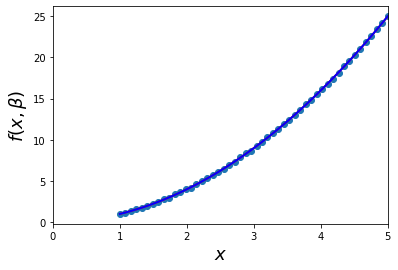

In [ ]:
#Решение номер 4 
#Добавим шума в данные сделанные по функции f(x,b) с коэффициентами b = (1,2)
beta = (1,2)
def f(x,b0,b1):
  return b0*x**b1
#Зададим массив точек xi 
xdata=np.linspace(1,5,50)
#Создаем теоретически правильные значения точек yi без шума 
y=f(xdata,*beta)
# Зашумляем эти данные 
ydata=y+0.05 * np.random.randn(len(xdata))
beta_opt,beta_cov=scipy.optimize.curve_fit(f,xdata,ydata)
print(beta_opt)
#Вычислим линейное отклонение 
lin_dev=sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение 
residuals = ydata-f(xdata,*beta_opt)
fres=sum(residuals**2)
print(fres)

fig,ax=plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$",fontsize=18)
ax.set_ylabel(r"$f(x,\beta)$",fontsize=18)

1.2. Теоретический материал – Задачи регрессии
Линейная регрессия - это широко используемый метод статистического 
анализа, который использует регрессионный анализ в математической 
статистике для определения количественной взаимосвязи между двумя или 
более переменными. Если регрессионный анализ включает две или более 
независимых переменных, а связь между зависимой и независимой 
переменными является линейной, тогда имееи дело с множественной линейной 
регрессией.


В этом разделе мы увидим, как библиотеку Scikit-Learn в Python для машинного 
обучения можно использовать для реализации функций регрессии. Мы начнем 
с простой линейной регрессии с участием двух переменных, а затем перейдем к 
линейной регрессии с участием нескольких переменных.
1.2.1 Пример

Задача:
Построим простую линейную регрессию в Python с использованием 
библиотеки scikit-learn

   Учебное время   Oценка
0            0.50      10
1            0.75      22
2            1.00      13
3            1.25      20
4            1.50      40
(20, 2)


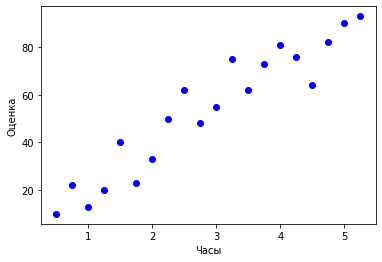

In [ ]:
#Импортируем необходимые библиотеки 
#Используем пандас и нампай для для обраотки данных 
# matoillib для визуализации  и sklearn для оьучения наборов данных и импорта моделей 
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import  LinearRegression
#Создадим набор данных для описания взаимосвязи между временем обучения студента и его успеваемостью 
my_dict = {'Учебное время ': [0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  ,
       3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25],
       'Oценка':[10,22,13,20,40,23,33,50,62,48,55,75,62,73,81,76,64,82,90,93]}
      
dataset=pd.DataFrame(my_dict)
print(dataset.head())
print(dataset.shape)
dataset.describe()
#Нарисуем точечную диограмму 
plt.scatter (dataset['Учебное время '],dataset['Oценка'],color='b',label='Данные экзамена ')
plt.xlabel('Часы')
plt.ylabel('Оценка')
plt.show()


После того как мы получили представление о данных, разделим информацию 
на «атрибуты» и «метки». Атрибуты – это независимые переменные, а метки 
– это зависимые переменные, значения которых должны быть предсказаны. В 
нашем наборе всего два столбца и необходимо предсказать оценку в 
зависимости от количества часов. Чтобы извлечь атрибуты и метки, 
выполняем следующий скрипт:

In [ ]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,1].values
print('Дата Х= ',X)
print('Дата y= ',y)
#Теперь имея атрибуты и метки необходимо разделить их на обучающий и тестовый набор
#Ниже разбиваем 80 % на обучающий и 20 % на тестовый 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
#Далее можно обучить алгоритм линейной регресии 
#Необходимо импортировать класс LinearRegression , создать его экземпляр и вызвать метод fit 
regressor= LinearRegression()
regressor.fit(X_train,y_train)
#Приводим получившиеся коэффициены для линии регресии
print(regressor.intercept_)
print(regressor.coef_)

Дата Х=  [[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [3.75]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.25]]
Дата y=  [10 22 13 20 40 23 33 50 62 48 55 75 62 73 81 76 64 82 90 93]
2.161556603773583
[17.50943396]


Получившийся результат можно интерпретировать следующим образом: с 
каждым затраченным часом на обучение результат экзамена повышается 
приблизительно на 17 баллов. Далее можно построить прогнозы. Для этого мы 
будем использовать наши тестовые данные и посмотрим, насколько точно наш 
алгоритм предсказывает процентную оценку. 

Чтобы сделать прогноз на 
тестовых данных необходимо выполнить следующий код:

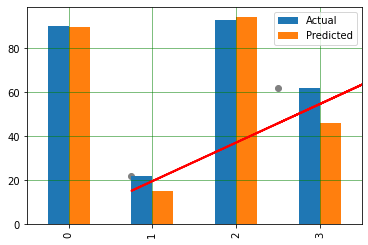

In [ ]:
y_pred=regressor.predict(X_test)
#Сравним фактические значения с прогнозируемыми
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df
#Визуализируем резуьтат представления в гистограммы 
df.plot(kind='bar')
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.scatter(X_test,y_test,color='gray')
plt.plot(X_test,y_pred,color='red',linewidth=2)
plt.show()

Задание:
Постройте модель линейной регрессии для произвольных данных из двух 
столбцов. Для примера можно взять точечную зависимость заработной платы от 
опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv). 
Найдите коэффициенты линии регрессии. Постройте прогноз.

Решение

In [ ]:
url=('https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv')
df=pd.read_csv(url)
df.head()
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
#Выполняем предобработку датасета 
df.info() # выведем сводную информацию
df.isna().sum() # найдем количество пропусков в колонках
df.describe() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


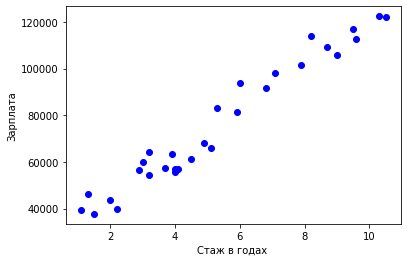

In [ ]:
plt.scatter (df['YearsExperience'],df['Salary'],color='b',label='Зависимость ЗП от стажа работы ')
plt.xlabel('Стаж в годах ')
plt.ylabel('Зарплата')
plt.show()


In [ ]:
#Дифференцируем
X=df.iloc[:,:-1].values
y=df.iloc[:,1].values
print(X)
print(y)
#Теперь имея атрибуты и метки необходимо разделить их на обучающий и тестовый набор
#Ниже разбиваем 80 % на обучающий и 20 % на тестовый 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
#Далее можно обучить алгоритм линейной регресии 
#Необходимо импортировать класс LinearRegression , создать его экземпляр и вызвать метод fit 
regressor= LinearRegression()
regressor.fit(X_train,y_train)
#Приводим получившиеся коэффициены для линии регресии
print(regressor.intercept_)
print(regressor.coef_)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]
26780.09915062818
[9312.57512673]


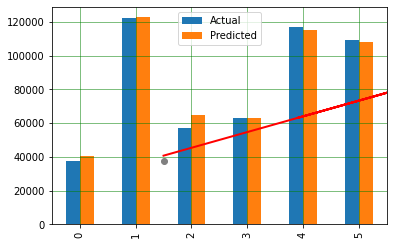

In [ ]:
y_pred=regressor.predict(X_test)
#Сравним фактические значения с прогнозируемыми
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df
#Визуализируем резуьтат представления в гистограммы 
df.plot(kind='bar')
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.scatter(X_test,y_test,color='gray')
plt.plot(X_test,y_pred,color='red',linewidth=2)
plt.show()

1.3. Теоретический материал – Множественная регрессия
В предыдущем примере мы проиллюстрировали линейную регрессию 
с двумя переменными. Однако, почти все реальные задачи имеют больше 
параметров. Линейная регрессия с участием нескольких переменных 
называется «множественной линейной регрессией» или многомерной 
линейной регрессией. Шаги для выполнения множественной линейной 
регрессии аналогичны шагам для простой . Разница заключается в оценке. 
Вы можете использовать множественную регрессию, чтобы узнать, какой 
фактор оказывает наибольшее влияние на прогнозируемый результат или 
как различные переменные связаны друг с другом.
1.3.1 Пример
Задача:
Для решения задачи множественной регрессии можно задействовать уже 
известный метод numpy.linalg.lstsq.

In [ ]:

#Импортируем необходимые библиотеки 
#Используем пандас и нампай для для обраотки данных 
# matoillib для визуализации  и sklearn для оьучения наборов данных и импорта моделей 
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn import metrics
import numpy as np
y=[1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]

x=[[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
   [2,3,4,5,2,1,2,4,5,7,6,5,3,2,3,5,9,7,3,2,1,2,3],
   [1,2,3,5,6,3,2,3,3,4,4,6,7,8,5,3,3,3,2,1,1,2,2]
   ]
new_y=np.array(y)
new_y=new_y.transpose()
df1=pd.DataFrame(new_y)
new_x=np.array(x)
new_x=new_x.transpose()
df2=pd.DataFrame(new_x)
df1=df1.rename(columns={0:'y'},inplace=False)
print(df1)
df2=df2.rename(columns={0:'x1',1:'x2',2:'x3'},inplace=False)
df2
frames=[df1,df2]
dataset=pd.concat([df1,df2],axis=1,join='inner')
dataset.head()
#Изучим данные 
print(dataset.shape)
dataset.describe()
X=dataset[['x1','x2','x3']]
y=dataset['y']
#Теперь имея атрибуты и метки необходимо разделить их на обучающий и тестовый набор
#Ниже разбиваем 80 % на обучающий и 20 % на тестовый 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
regressor= LinearRegression()
regressor.fit(X_train,y_train)
#Выведем коэффициенты модели 
coeff_df=pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
print(coeff_df)
#Делаем прогноз
y_pred=regressor.predict(X_test)
#Сравним фактические значения с прогнозируемыми
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df
#Оценка производительности алгоритма 
print('Mean sequared Error :',metrics.mean_squared_error(y_test,y_pred))



    y
0   1
1   2
2   3
3   4
4   3
5   4
6   5
7   3
8   5
9   5
10  4
11  5
12  4
13  5
14  4
15  5
16  6
17  0
18  6
19  3
20  1
21  3
22  1
(23, 4)
    Coefficient
x1     0.213713
x2     0.087768
x3     0.140449
Mean sequared Error : 1.0880793228415608


Задание
Задача:
Постройте модель множественной линейной регрессии для произвольных 
данных из нескольких столбцов. Для примера можно взять потребления 
газа (в миллионах галлонов) в 48 штатах США или набор данных о 
качестве красного вина (1) и (2) соответственно. Найдите коэффициенты
множественной регрессии. Постройте прогноз.
1. 
https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/pe
trol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-WineQuality/master/winequality-red.csv


Решение:

In [ ]:
url = 'https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'
df=pd.read_csv(url)
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
X=df.iloc[:,-2].values
y=df.iloc[:,1].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

regressor= LinearRegression()
regressor.fit(X_train,y_train)
#Выведем коэффициенты модели 
print(regressor.intercept_)
print(regressor.coef_)
print(coeff_df)
#Делаем прогноз
y_pred=regressor.predict(X_test)
#Сравним фактические значения с прогнозируемыми
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df
#Оценка производительности алгоритма 
print('Mean sequared Error :',metrics.mean_squared_error(y_test,y_pred))
y_pred=regressor.predict(X_test)
y_pred=regressor.predict(X_test)
#Сравним фактические значения с прогнозируемыми
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print(df)
#Визуализируем резуьтат представления в гистограммы 
df.plot(kind='bar')
plt.scatter(X_test,y_test,color='gray')
plt.plot(X_test,y_pred,color='red',linewidth=1)
plt.show()


ValueError: ignored

Задание*
Задача: Экспериментально получены N − значений величины Y при 
различных значениях величины X. Построить полиномы первой и второй 
степени, аппроксимирующие результаты эксперимента, с применением 
метода наименьших квадратов. Результаты выводятся в виде таблиц 
значений и графиков, полученных полиномов. Расчеты выполняются ручкой 
на бумаге и сравниваются с результатами программы.

-----------------------------------------------------------------------------------
[[0.  1. ]
 [0.2 1. ]
 [0.4 1. ]
 [0.6 1. ]
 [0.8 1. ]
 [1.  1. ]]
Уравнение тренда имеет следующий вид:  -0.4285714285714293 t + 4.380952380952379


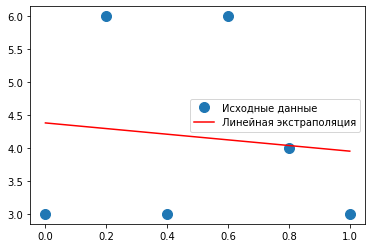

In [ ]:
from numpy import * 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn import metrics
from numpy.random import *
x=np.array([0.0,0.2,0.4,0.6,0.8,1])
y=np.array([3.0,6.0,3.0,6.0,4.0,3.0])

#Нахождение коэффициентов функции вида y = ax+b методом наименьших квадратов 
print('-----------------------------------------------------------------------------------')
A=np.vstack([x,np.ones(len(x))]).T
print(A)
#Используем метод lstsq для решения уравнения относительно вектора p
m,c=np.linalg.lstsq(A,y,rcond=None)[0]
print('Уравнение тренда имеет следующий вид: ',m,'t','+',c)
#Находим коэффициенты при составляющих вектора m

#Рисуем точки 
plt.plot(x,y,'o',label='Исходные данные',markersize=10)
plt.plot(x,m*x+c,'r',label='Линейная экстраполяция')
plt.legend()
plt.show()

-----------------------------------------------------------------------------------
[0.  0.2 0.4 0.6 0.8 1. ]
[3. 6. 3. 6. 4. 3.]
-----------------------------------------------------------------------------------
Vector m = [[0.   0.   1.  ]
 [0.04 0.2  1.  ]
 [0.16 0.4  1.  ]
 [0.36 0.6  1.  ]
 [0.64 0.8  1.  ]
 [1.   1.   1.  ]]
 Квадратичная регрессия = [-7.14285714  6.71428571  3.42857143]


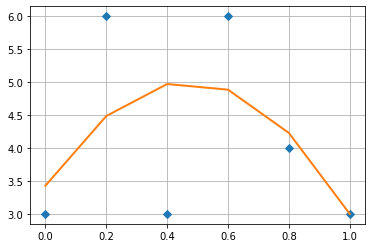

In [ ]:
from numpy import * 
from numpy.random import *
#Генерируем случайные X и Y
delta=1.0
x=np.array([0.0,0.2,0.4,0.6,0.8,1])
y=np.array([3.0,6.0,3.0,6.0,4.0,3.0])

#Записывам данные в файл 
x.tofile('x_data.txt','\n')
y.tofile('y_data.txt','\n')
#Читаем данные из файла
print('-----------------------------------------------------------------------------------')
x=fromfile('x_data.txt',float,sep='\n')
y=fromfile('y_data.txt',float,sep='\n')
print(x)
print(y)
#Нахождение коэффициентов функции вида y = ax^2+bx+c методом наименьших квадратов 
#Задаем вектор m=[x**2,x,E]
print('-----------------------------------------------------------------------------------')
m=vstack((x**2,x,ones(6))).T
print('Vector m =',m)
#Находим коэффициенты при составляющих вектора m

s=np.linalg.lstsq(m,y,rcond=None)[0]
print(' Квадратичная регрессия =',s)

#На отрезке [0,5]
x_prec=linspace(0,1,6)
#Рисуем точки 
plt.plot(x,y,'D')
#Рисуем кривую вида y = ax^2+bx+c подставляя из решения коэффициента  s[0],s[1].s[2]
plt.plot(x_prec,s[0]*x_prec**2+s[1]*x_prec+s[2],'-',lw=2)
plt.grid()
plt.savefig('парабола.png')